In [1]:
import numpy as np
from scipy.linalg import lstsq
from numpy.random import rand, randn, permutation
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def MAE_irls(A,b,xO,numIter):
    # Mean absolute error, robust to ouliers
    x = x0
    for ii in range(numIter):
        r = A@x - b
        W = np.diag(1/np.sqrt(2*np.abs(r[:,0])))
        x = lstsq(W@A,W@b)[0]
    return x

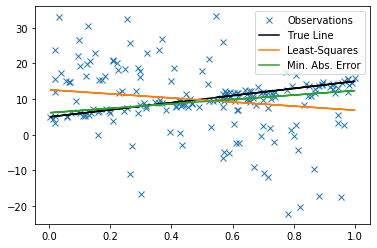

In [3]:
N = 200
np.random.seed(0)
a, b = 10, 5
xx = rand(N,1)
zz = np.zeros((N,1))
k = N//2
randPerm = permutation(N)
outlierSubset = randPerm[:k]
zz[outlierSubset] = 1 # outliers

yy = np.multiply(1-zz, a*xx + b + randn(N,1)) \
+ np.multiply(zz, 20 - 20*xx + 10*randn(N,1))

plt.plot(xx,yy,'x', label='Observations')
plt.plot(xx,a*xx + b, 'k-',label='True Line')

A = np.append(xx, np.ones((N,1)),axis=1)
xxLS = lstsq(A,yy)[0]
yyLS = xxLS[0]*xx + xxLS[1]
plt.plot(xx,yyLS,label='Least-Squares')

numIter = 10
x0 = randn(2,1)
xHat = MAE_irls(A,yy,x0,numIter)
yyMAE = xHat[0]*xx + xHat[1]
plt.plot(xx,yyMAE,label='Min. Abs. Error')
plt.legend();